## Week 3 CNN Project
### Import Packages

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import cv2
import skimage

## Load Data

In [2]:
print(f'{len(os.listdir("../input/histopathologic-cancer-detection/train"))} pictures in train.')
print(f'{len(os.listdir("../input/histopathologic-cancer-detection/test"))} pictures in test.')

220025 pictures in train.
57458 pictures in test.


In [3]:
print(os.listdir("../input/histopathologic-cancer-detection"))

['sample_submission.csv', 'train_labels.csv', 'test', 'train']


In [4]:
data_train = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


## Plot

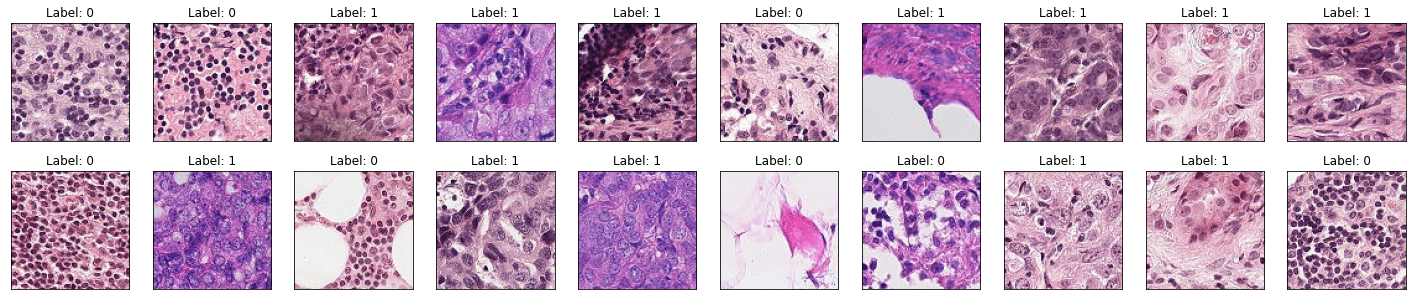

In [5]:
fig = plt.figure(figsize=(25,5))
train_imgs = os.listdir("../input/histopathologic-cancer-detection/train")
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    im = Image.open("../input/histopathologic-cancer-detection/train/" + img)
    plt.imshow(im)
    lab = data_train.loc[data_train['id'] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {lab}')

In [6]:
data_train['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [7]:
y = data_train['label']

Text(0, 0.5, '# of samples')

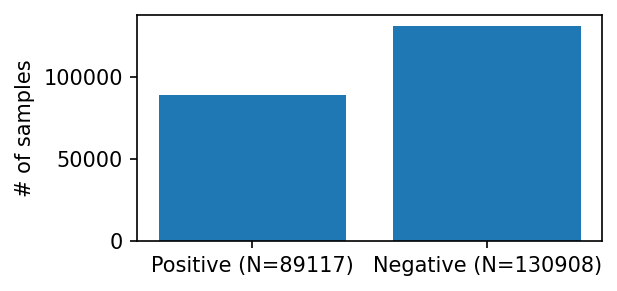

In [8]:
fig = plt.figure(figsize=(4, 2),dpi=150)
plt.bar([1,0], [(y==0).sum(), (y==1).sum()]); 
plt.xticks([1,0],["Negative (N={})".format((y==0).sum()),"Positive (N={})".format((y==1).sum())]);
plt.ylabel("# of samples")

In [9]:
positive_samples = data_train[y == 1]
negative_samples = data_train[y == 0]

In [10]:
positive_samples.head()

,id,label
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
6,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1
7,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1
11,c3d660212bf2a11c994e0eadff13770a9927b731,1
14,94fa32b29cc1c00403176c0795fffa3cfaa0f20e,1


In [11]:
positive_samples = positive_samples.reset_index(drop=True)

In [12]:
positive_samples.head()

,id,label
0,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
1,a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,1
2,7f6ccae485af121e0b6ee733022e226ee6b0c65f,1
3,c3d660212bf2a11c994e0eadff13770a9927b731,1
4,94fa32b29cc1c00403176c0795fffa3cfaa0f20e,1


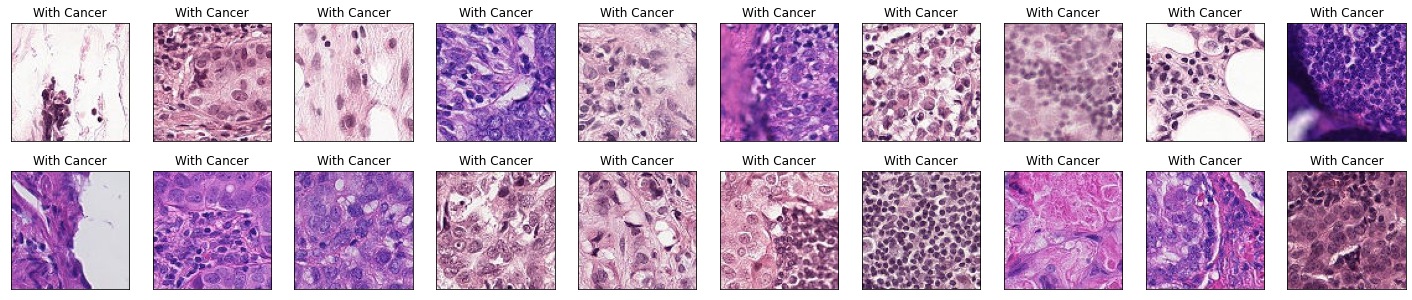

In [13]:
fig = plt.figure(figsize=(25,5))

for index, row in positive_samples.iloc[:20].iterrows():
    ax = fig.add_subplot(2, 20//2, index+1, xticks=[], yticks=[])
    im = Image.open("../input/histopathologic-cancer-detection/train/" + row['id'] + '.tif')
    plt.imshow(im) 
    lab = row['label']
    if lab == 1:
        ax.set_title("With Cancer")
    else:
        ax.set_title("No Cancer")

In [14]:
negative_samples = negative_samples.reset_index(drop=True)
negative_samples.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,755db6279dae599ebb4d39a9123cce439965282d,0
2,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
3,068aba587a4950175d04c680d38943fd488d6a9d,0
4,acfe80838488fae3c89bd21ade75be5c34e66be7,0


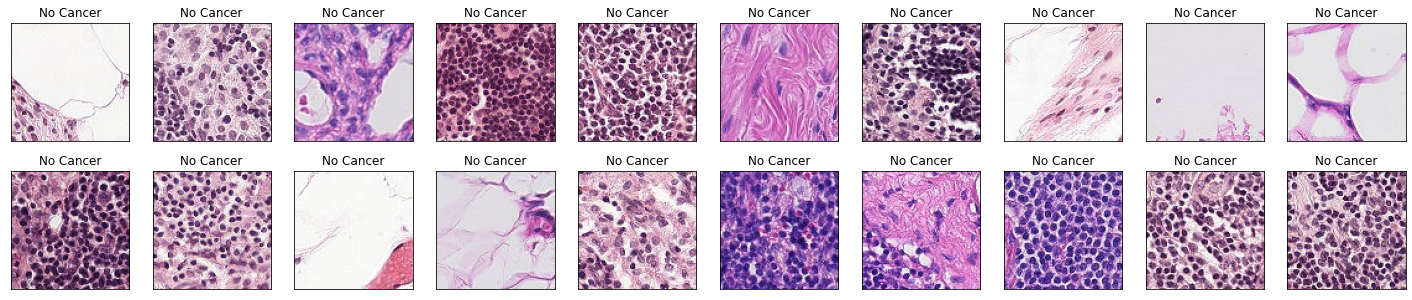

In [15]:
fig = plt.figure(figsize=(25,5))

for index, row in negative_samples.iloc[:20].iterrows():
    ax = fig.add_subplot(2, 20//2, index+1, xticks=[], yticks=[])
    im = Image.open("../input/histopathologic-cancer-detection/train/" + row['id'] + '.tif')
    plt.imshow(im)
    lab = row['label']
    if lab == 1:
        ax.set_title("With Cancer")
    else:
        ax.set_title("No Cancer")